##### Grading Feedback Cell

**Question 0 (-2 pts if not provided):**  Enter your name and SU ID in the cell below.

Your name and SU ID Here: Abhijith Anil Vamadev 495204994


# IST 718: Big Data Analytics

- Professors: 
  - Willard Williamson <wewillia@syr.edu>
  - Emory Creel <emcreel@syr.edu>
- Faculty Assistant: Shubham Sharma <shsharma@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.

#### Read the data files
The cell below reads the assignment data files from github

In [1]:
%%bash
# define an array of data file names
data_file_array=("indicator_gapminder_population.csv" "indicator_gapminder_under5mortality.csv" "indicator_life_expectancy_at_birth.csv" "indicator_undata_total_fertility.csv")

# for each data file
for file in ${data_file_array[@]}; do
  # if the data file does not exist on the local computer
  if [[ ! -f ./${file} ]]; then 
    # download the data file from github and save it on the local computer
    wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/${file} &> /dev/null
  fi  
done


# Question 1 (10 pts)
In the game of [roullete](https://en.wikipedia.org/wiki/Roulette) you can bet on several things including if the ball will land on black or red. In a black or red bet, if you win, you double your earnings. How does the casino make money? If you look at the possibilities you realize that the chance of red or black are both slightly less than 1/2. There are two green spots, so the chance of landing on black (or red) is actually 18/38, or 9/19.<br>
Create a utility function which can be used in a monte carlo simulation named get_outcome. The get_outcome function takes as an argument the number of times you play (or spin) the roulette wheel and returns the player's earnings for the number of spins specified.  Assume that the player bets exactly one dollar on black for each spin of the wheel.

In [1]:
# your code here

#importing libraies
from random import randint 

def get_outcome(num_plays): #function defintion
    FINAL_RETURNS = 0 #returns for the player at the end 
    roulette = ['B', 'G', 'G', 'R','B', 'B', 'R', 'R', 'B', 'R', 'B', 'R', 'R', 'R', 'B', 'R', 'B', 'R','B', 'R','B', 'R','B', 'R','B', 'R','B', 'R','B', 'R','B', 'R','B', 'R', 'B', 'R', 'B', 'B']
    #simulating a roulette spin ball
    for i in range(num_plays):
        random_index = randint(0, 37) #picking a random slot in the roulette
        BET = 1
        if(roulette[random_index] == 'B'):
            FINAL_RETURNS = FINAL_RETURNS + 1
        else: 
            FINAL_RETURNS = FINAL_RETURNS - 1
    return FINAL_RETURNS


In [2]:
# Grading cell - do not change or delete
num_plays = 10000
get_outcome(num_plays) / num_plays

-0.0562

##### Grading Feedback Cell

# Question 2 (10 pts)
Using the get_outcome function defined above, use a monte carlo simulation to study the distribution of total earnings.  Run 4 simulations for number of roulette plays = 10, 25, 100, and 1000 where each of the 4 simulations is executed 500 times.  Collect the results into a 2 dimensional numpy array named roulette_sim_array.  Make histogram plots for each of the 4 simulations.  Based on the histogram plots, describe what happens to toal earnings as the number of plays increases.

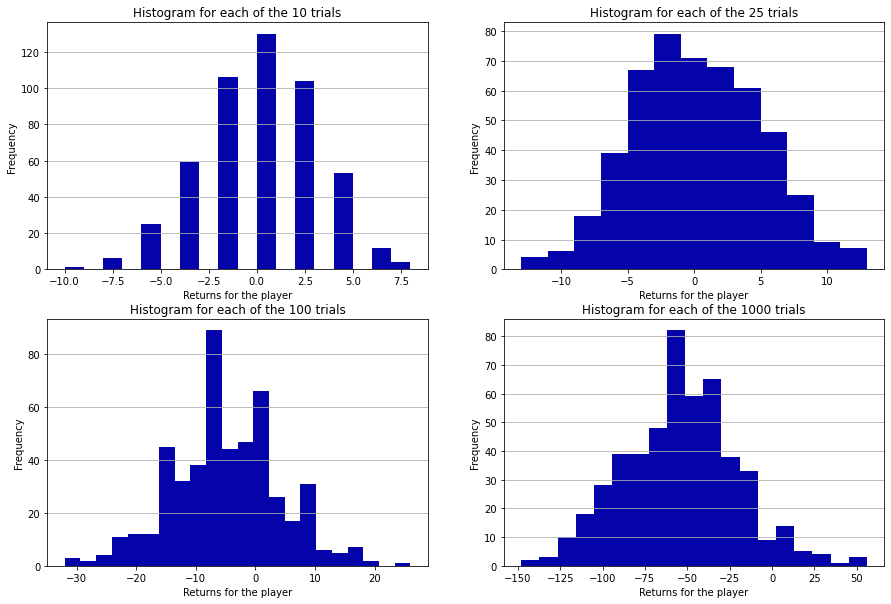

In [3]:
# your code here
#import libraries
import matplotlib.pyplot as plt
import numpy as np 

#initalization
roulette_plays = [10, 25, 100, 1000] #num of plays
roulette_sim_array = [] #final array with simulations

for num_plays in roulette_plays:
    returns = []
    for iterator in range(500):
        returns.append(get_outcome(num_plays))
    roulette_sim_array.append(returns)

roulette_sim_array = np.asarray(roulette_sim_array) #final simulations as a 2d numpy array

plt.figure(figsize=(15,10)) #plot size
for index, num in enumerate(roulette_sim_array):
    plt.subplot(2, 2, index + 1) #creating subplots
    n, bins, patches = plt.hist(x=num, bins='auto', color='#0504aa') #histogram
    plt.grid(axis='y', alpha=1)
    plt.plot(ax=plt.gca())
    plt.xlabel('Returns for the player')
    plt.ylabel('Frequency')
    plt.title('Histogram for each of the {} trials'.format(roulette_plays[index]) )
plt.show()


##### Grading Feedback Cell

Your explanation here:<br>  
As it can be seen from the histograms, as the number of games played increases the return for the player worsens i.e the player is at a loss. For the simulation of 10 trials, -2 to 0 dollars was the most recurring loss, but as the number of trials increased to 25, 100 and 1000, the return also negatively increased from -5, 10, and to -50. As more games are played the player starts loosing more money

##### Grading Feedback Cell

# Question 3 (10 pts)
Using the central limit theorem, create a pandas dataframe named roulette_df containing the sampling distribution of the means from the sample data in the numpy array above.  The pandas dataframe shall have 4 columns labeled with the simulation names. Using data in the roulette_df, plot histograms for each of the sampling distributions - you should have 4 histograms in total.<br>  

The following question is based on the theory of central limit theorem sampling.  Assuming you don't know the underlying distribution of the population from which the samples were drawn, some of the histograms are gauranteed to be Gaussian in shape, some are not gauranteed, and some are in a transition region. For each of the 4 simulations, describe if you think the shape is gauranteed to be gaussian, not gauranteed to be Gaussian, or in a transition area between a gaurantee and no gaurantee.

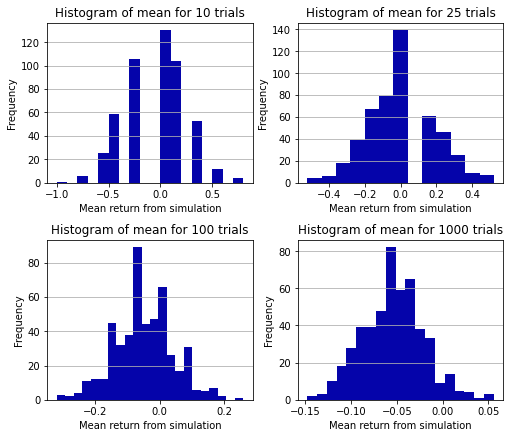

In [4]:
# Your histogram code here
import pandas as pd
mean_10trials = [i/10 for i in roulette_sim_array[0]] #mean array for each of the ssimulations starting from 10 to 10000 simulations
mean_25trials = [i/25 for i in roulette_sim_array[1]]
mean_100trials = [i/100 for i in roulette_sim_array[2]]
mean_1000trials = [i/1000 for i in roulette_sim_array[3]]

final_dict = {'10 Trials': mean_10trials, 
              '25 Trials': mean_25trials, 
              '100 Trials': mean_100trials,
              '1000 Trials':mean_1000trials}
#creating final dataframe
roulette_df = pd.DataFrame(final_dict)

#plot size
plt.figure(figsize =(7,6))
for i in range(4):
    plt.subplot(2, 2, i + 1) #subplots
    n, bins, patches = plt.hist(x=roulette_df. iloc[:, i], bins='auto', color='#0504aa')#histogram
    plt.grid(axis='y', alpha=1)
    plt.plot(ax=plt.gca())
    plt.xlabel('Mean return from simulation')
    plt.ylabel('Frequency')
    plt.subplots_adjust(hspace=1) 
    plt.title('Histogram of mean for {} trials'.format(roulette_plays[i]) )
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()



In [5]:
# Grading cell - do not modify
display(roulette_df.head())

,10 Trials,25 Trials,100 Trials,1000 Trials
0,0.0,-0.28,-0.14,-0.016
1,-0.2,0.04,-0.16,-0.082
2,0.0,-0.28,-0.04,-0.034
3,0.2,0.04,-0.06,-0.128
4,-0.4,-0.12,-0.16,-0.032


##### Grading Feedback Cell

Your explanation here:<br>
- The first histogram containing 10 trials, has not become a Gaussian yet. 
- The second histogram containing 25 trials, has also not completely become Gaussian, it is in a transition to become Gaussian. 
- The third histogram containing 100 trials has not also become completely Gaussian, it is also in a transition to become Gaussian.
- The fourth histogram containg 1000 trials has become Gaussian. As the number of trials begin to increase the more Gaussian it will look like. 

##### Grading Feedback Cell

# Question 4 (20 pts)
Create a new monte carlo simulation that calculates the probability that the casino loses money based on the number of times that a player plays roulette.  Create a function p_casino_loss that takes as an argument the number of times that the player plays roulette (n_plays), and returns the probability that the casino loses money.  Your code should simulate spinning the roulette wheel.  Run the n_plays simulation a fixed large number of times (100 works) and return the average probability result.  Using data collected from p_casino_loss, produce a line plot that shows the probability that the casino loses money vs. the number of games played for number of games between 25 and 1000.  Describe what the results of the simulation show.

Probabiity that the casino losses money for 100 plays:  48.7%


Text(0.5, 1.0, 'Probability of Loss for Casino vs Number of Trials 10,25,100,1000 in a Simulation')

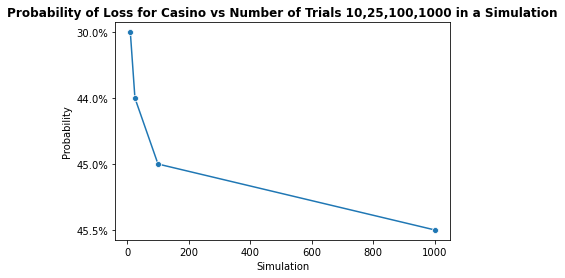

In [79]:
# your code here
from random import randint 
import seaborn as sns

roulette_plays = [10, 25, 100, 1000] #simulation array
    
def p_casino_loss(n_plays):
    FINAL_RETURNS = 0
    roulette = ['B', 'G', 'G', 'R','B', 'B', 'R', 'R', 'B', 'R', 'B', 'R', 'R', 'R', 'B', 'R', 'B', 'R','B', 'R','B', 'R','B', 'R','B', 'R','B', 'R','B', 'R','B', 'R','B', 'R', 'B', 'R', 'B', 'B']
    neg = 0
    for i in range(n_plays):
        random_index = randint(0, 37)
        BET = 1
        if(roulette[random_index] == 'B'):
            FINAL_RETURNS = FINAL_RETURNS + 1
            neg += 1
        else: 
            FINAL_RETURNS = FINAL_RETURNS - 1
    prob = (neg/n_plays) * 100
    return str(round(prob, 2)) + '%' 

# def p_casino_loss(n_plays):
#     return 1 - (abs(get_outcome(num_plays))/num_plays) 

print("Probabiity that the casino losses money for 100 plays: ", p_casino_loss(100))
line_plot_y = []
for x in roulette_plays:
    line_plot_y.append([x, p_casino_loss(x)])

line_plot = pd.DataFrame( data = line_plot_y, columns = ['Simulation', 'Probability']) 
sns.lineplot( x = "Simulation",
             y = "Probability",
             data = line_plot, marker="o");
plt.title('Probability of Loss for Casino vs Number of Trials 10,25,100,1000 in a Simulation', fontweight ="bold")
    

Your explanation here:<br>
The results of the simulation of 10, 25, 100 and 1000 trials show that as the number of games played for the casino increases, their probablity of loosing dramatically decreases overtime. As more games are being played, the probability that Casino loses  falls below 50%. 

##### Grading Feedback Cell

# Question 5 (10 pts)
Compute the following matrix dot product manually by creating 2 dimensinal nympy arrays for each matrix, computing the matrix multiply using python for loops, and loading a new 2 dimensional numpy array with the answer.  Print the resulting numpy array.

$$
\quad
\begin{bmatrix} 
3 & 7 \\
6 & 9 \\
4 & 2 \\
\end{bmatrix}
\quad
*
\quad
\begin{bmatrix} 
2 & 5 & 7\\
2 & 5 & 1
\end{bmatrix}
\quad
$$

In [45]:
# your code here
a = np.array([[3,7],[6,9], [4,2]]) #array 1
b = np.array([[2,5,7], [2, 5, 1]]) #array 2

def dotProduct(array1, array2): #function to do dot produc
    if(array1.shape[1] == array2.shape[0]): #validation check
        new_array = np.zeros((array1.shape[0], array2.shape[1])) #create an empty array with 0s
        for rows in range(array1.shape[0]):
            for cols in range(array2.shape[1]):
                for rows_b in range(array2.shape[0]): #for loops looping through a rows, b columns, b rows.
                    new_array[rows, cols] = new_array[rows, cols] + array1[rows, rows_b] * array2[rows_b, cols]
        return new_array #return final array
    else:
        return "Error mismatching arrays, provide valid arrays"

dotProduct(a, b)          
        

array([[20., 50., 28.],
       [30., 75., 51.],
       [12., 30., 30.]])

##### Grading Feedback Cell

# Question 6 (10 pts)
Read each of the 4 assignment csv files into pandas dataframes named population_df, morttality_df, life_exp_df, and fertility_df.  Rename the column with the country names as "Country" in each of the dataframes.  Hint - the bash datafiles data_file_array at the start of the assignment has the file names you need to load.  Another thing you can do is click the colab file icon to the left to view the file names stored on the local colab instance.

In [46]:
# your code here
population_df = pd.read_csv("indicator_gapminder_population.csv") #reading all files
morttality_df = pd.read_csv("indicator_gapminder_under5mortality.csv")
life_exp_df = pd.read_csv("indicator_life_expectancy_at_birth.csv")
fertility_df = pd.read_csv("indicator_undata_total_fertility.csv")
columns = [population_df, morttality_df, life_exp_df, fertility_df] #columns variable
for i in columns:
    i.rename(columns={i.columns[0]: "Country"}, inplace = True) #changing first column to Country

In [47]:
# grading cell - do not modify
display(population_df.head())
display(morttality_df.head())
display(life_exp_df.head())
display(fertility_df.head())

,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,...,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700,15700,15700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"410,445",423591,438671,457234,478227,506889,552800,610036,672544,...,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,"2,503,218",2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,...,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,468.58,468.58,468.58,468.58,468.58,468.58,469.98,469.98,469.98,...,116.3,113.2,110.4,107.6,105.0,102.3,99.5,96.7,93.9,91.1
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,375.20,...,19.5,18.7,17.9,17.3,16.6,16.0,15.5,14.9,14.4,14.0
4,Algeria,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,460.21,...,32.1,30.7,29.5,28.4,27.4,26.6,25.8,25.2,24.6,24.0


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.2110,28.200753,28.190507,28.18026,28.170013,28.159767,28.14952,28.139273,28.129027,...,53.2,53.6,54.0,54.5,54.8,55.2,55.5,56.2,56.91,57.63
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,...,74.5,74.7,74.9,75.0,75.2,75.5,75.7,75.8,75.90,76.00
4,Algeria,28.8224,28.822400,28.822400,28.82240,28.822400,28.822400,28.82240,28.822400,28.822400,...,74.8,75.0,75.3,75.6,75.9,76.1,76.2,76.3,76.40,76.50


,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


##### Grading Feedback Cell

# Question 7 (10 pts)
The data frames from the question above are organized such that rows are countries and columns are years.  Reorganize each data frame such that each row contains 3 columns: country, year, and a data value.  This is known as the long or tidy format.  For example, the population data frame columns start out as country, year, year, year, ..., year.  After reorganizing, the population data frame columns will contain only 3 columns: country, year, and population.  Save the reorganized data into new data frames named tidy_population_df, tidy_morttality_df, tidy_life_exp_df, and tidy_fertility_df.  You are free to use any means necessary to perform this task but the pandas melt function may be useful.

In [48]:
# your code here
columns_pop = list(population_df.columns[1:]) #taking the columns from population df
tidy_population_df = population_df.melt(id_vars=['Country'], value_vars=columns_pop, var_name='Year', value_name='Population') #melting the df into desiered format

columns_mor = list(morttality_df.columns[1:])
tidy_morttality_df = morttality_df.melt(id_vars=['Country'], value_vars=columns_mor, var_name='Year', value_name='Morttality')

columns_life = list(life_exp_df.columns[1:])
tidy_life_exp_df =life_exp_df.melt(id_vars=['Country'], value_vars=columns_life, var_name='Year', value_name='Life_exp')

columns_fert = list(fertility_df.columns[1:])
tidy_fertility_df = fertility_df.melt(id_vars=['Country'], value_vars=columns_fert, var_name='Year', value_name='Fertility')


In [49]:
# grading cell - do not modify
display(tidy_population_df.head())
print(tidy_population_df.size)
display(tidy_morttality_df.head())
print(tidy_morttality_df.size)
display(tidy_life_exp_df.head())
print(tidy_life_exp_df.size)
display(tidy_fertility_df.head())
print(tidy_fertility_df.size)

,Country,Year,Population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,"410,445"
4,Algeria,1800,"2,503,218"


66825


,Country,Year,Morttality
0,Abkhazia,1800,NaN
1,Afghanistan,1800,468.58
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,375.20
4,Algeria,1800,460.21


178200


,Country,Year,Life_exp
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.2110
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.4000
4,Algeria,1800,28.8224


168480


,Country,Year,Fertility
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


168480


##### Grading Feedback Cell

# Question 8 (10 pts)
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe.  The join operation should not throw away any data.  Name the new dataframe concat_df.  Next, delete all rows where life expectancy and fertility are NAN.

In [83]:
# your code here
concat_df = tidy_population_df.merge(tidy_morttality_df,on=['Country', 'Year']).merge(tidy_life_exp_df,on=['Country', 'Year']).merge(tidy_fertility_df,on=['Country', 'Year']) #merge all dfs
concat_df.dropna(subset=['Life_exp', 'Fertility'], how = 'all', inplace = True) #dropping NA for Life_exp and Fertility


In [84]:
# grading cell - do not modify
display(concat_df.head())
print(concat_df.shape)

,Country,Year,Population,Morttality,Life_exp,Fertility
1,Afghanistan,1800,3280000,468.58,28.2110,7.00
3,Albania,1800,"410,445",375.20,35.4000,4.60
4,Algeria,1800,"2,503,218",460.21,28.8224,6.99
7,Angola,1800,1567028,485.68,26.9800,6.93
9,Antigua and Barbuda,1800,37000,473.60,33.5360,5.00


(16438, 6)


##### Grading Feedback Cell

# Question 9 (10 pts)
Using concat_df, report the child mortality rate and life expectancy in 2015 for these 5 countries:
1. Sri Lanka
2. Poland
3. Malaysia
4. Pakistan
5. Thailand

In [135]:
# Your code here
print('\nSri Lanka Life_expectancy: {}years, Child Mortality: {} per live births  in 2015'.format(float(concat_df[(concat_df['Country'] =='Sri Lanka') & (concat_df['Year'] =='2015')]["Life_exp"]),float(concat_df[(concat_df['Country'] =='Sri Lanka') & (concat_df['Year'] =='2015')]["Morttality"])))

print('\nPoland Life_expectancy: {}years, Child Mortality: {} per live births in 2015'.format(float(concat_df[(concat_df['Country'] =='Poland') & (concat_df['Year'] =='2015')]["Life_exp"]),float(concat_df[(concat_df['Country'] =='Poland') & (concat_df['Year'] =='2015')]["Morttality"])))

print('\nMayalsia Life_expectancy: {}years, Child Mortality: {} per live births in 2015'.format(float(concat_df[(concat_df['Country'] =='Malaysia') & (concat_df['Year'] =='2015')]["Life_exp"]),float(concat_df[(concat_df['Country'] =='Malaysia') & (concat_df['Year'] =='2015')]["Morttality"])))

print('\nPakistan Life_expectancy: {}years, Child Mortality: {} per live births in 2015'.format(float(concat_df[(concat_df['Country'] =='Pakistan') & (concat_df['Year'] =='2015')]["Life_exp"]),float(concat_df[(concat_df['Country'] =='Pakistan') & (concat_df['Year'] =='2015')]["Morttality"])))

print('\nThailand Life_expectancy: {}years, Child Mortality: {} per live births in 2015'.format(float(concat_df[(concat_df['Country'] =='Thailand') & (concat_df['Year'] =='2015')]["Life_exp"]),float(concat_df[(concat_df['Country'] =='Thailand') & (concat_df['Year'] =='2015')]["Morttality"])))


Sri Lanka Life_expectancy: 76.5years, Child Mortality: 8.7 per live births  in 2015

Poland Life_expectancy: 77.3years, Child Mortality: 5.2 per live births in 2015

Mayalsia Life_expectancy: 75.1years, Child Mortality: 8.2 per live births in 2015

Pakistan Life_expectancy: 66.5years, Child Mortality: 81.1 per live births in 2015

Thailand Life_expectancy: 75.1years, Child Mortality: 12.3 per live births in 2015


##### Grading Feedback Cell